# Kroven Project Data Visualization

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Type 505 

In [2]:
df505 = pd.read_csv("/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/v3Type505_HourlyIndoor.csv")

IOError: File /Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/v3Type505_HourlyIndoor.csv does not exist

In [50]:
df505.describe()

,1avg_wc_lr,1avg_wc_br2,1avg_wc_br1_br3,1set_point_ventilation_unit,1avg_t_lr,1avg_t_br2,1avg_t_br1_br3,1avg_co2_lr,1avg_co2_br2,1avg_co2_br1_br3,...,5avg_wc_lr,5avg_wc_br2,5avg_wc_br1_br3,5set_point_ventilation_unit,5avg_t_lr,5avg_t_br2,5avg_t_br1_br3,5avg_co2_lr,5avg_co2_br2,5avg_co2_br1_br3
count,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,17112.000000,...,17112.00000,17112.000000,17112.000000,17112.000000,17111.000000,17111.000000,17111.000000,17111.000000,17111.000000,17111.000000
mean,0.989473,0.874641,0.555043,1.399544,21.627040,21.933614,21.286845,751.809683,646.813073,587.690556,...,0.99995,0.999410,0.210431,1.145979,21.940302,24.696014,21.829940,799.165268,605.150617,735.833774
std,0.096393,0.330712,0.496549,0.502191,1.768196,1.928413,2.350814,126.837283,141.305461,137.364363,...,0.00399,0.023193,0.406152,0.357046,3.655615,6.347192,3.778725,252.681256,162.590049,225.676534
min,0.000000,0.000000,0.000000,1.000000,9.900000,13.900000,12.800000,536.300000,453.200000,419.600000,...,0.55000,0.000000,0.000000,1.000000,4.100000,4.800000,4.600000,-0.300000,-0.400000,-0.300000
25%,1.000000,1.000000,0.000000,1.000000,20.400000,20.600000,19.900000,663.800000,543.400000,515.700000,...,1.00000,1.000000,0.000000,1.000000,21.400000,21.200000,20.800000,677.750000,523.800000,600.800000
50%,1.000000,1.000000,1.000000,1.000000,21.600000,21.500000,20.900000,727.900000,611.500000,543.800000,...,1.00000,1.000000,0.000000,1.000000,22.200000,22.900000,21.700000,768.800000,601.400000,690.300000
75%,1.000000,1.000000,1.000000,2.000000,22.800000,23.000000,22.400000,807.725000,703.300000,597.000000,...,1.00000,1.000000,0.000000,1.000000,23.600000,30.700000,23.800000,913.400000,703.500000,922.400000
max,1.000000,1.000000,1.000000,3.000000,28.800000,29.300000,30.800000,1880.700000,1660.000000,1530.600000,...,1.00000,1.000000,1.000000,3.000000,27.600000,37.800000,28.800000,2939.000000,1455.300000,1388.500000


In [51]:
#Deal with the missing value

for column in df505.columns:
    if df505[column].count() != 17112:
        df505[column].fillna(df505[column].mean(),inplace = True)
    else:
        continue

In [52]:
df505['date_trunc'] = pd.to_datetime(df505['date_trunc'])

# Indoor Temperature 

In [53]:
avg_t={}
for i in range (1,6):
    lr = str(i) + 'avg_t_lr'
    br2 = str(i) + 'avg_t_br2'
    br1_br3 = str(i) + 'avg_t_br1_br3'
    avg_t[i] = (df505[lr]+df505[br2]+df505[br1_br3])/3

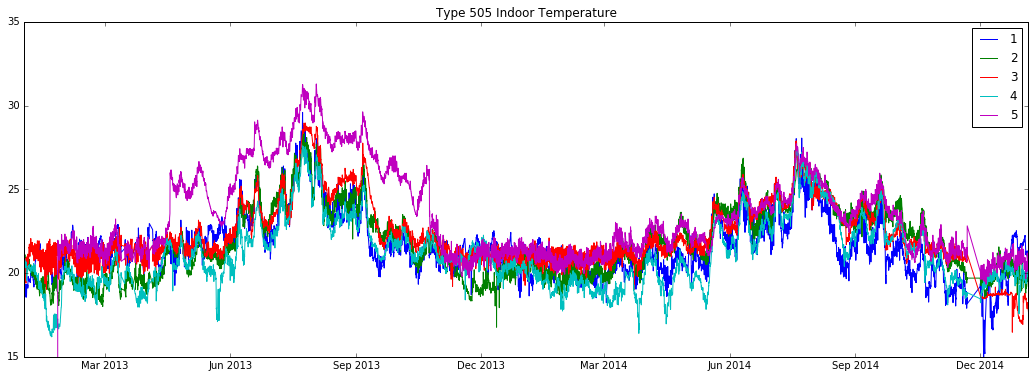

In [54]:
# Indoor temperature plot

fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (1,6):
    plt.plot(df505['date_trunc'],avg_t[i])
    plt.ylim(15,35)
plt.legend(('1','2','3','4','5'),loc='best') 
plt.title('Type 505 Indoor Temperature')


some intersting points:
1. Room 5 has significant higher temperature in the summer 2013

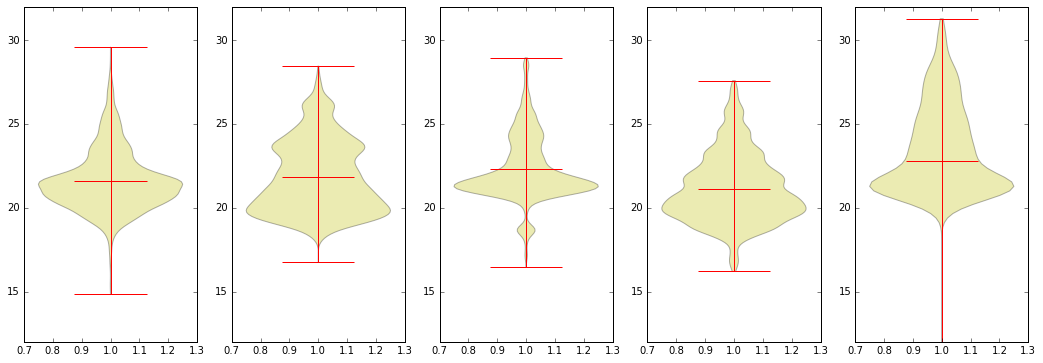

In [55]:
# average indoor temperature distribution

fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (1,6):
    axes[i-1].violinplot(avg_t[i],showmeans=True)
    axes[i-1].set_ylim(12,32)

# SetPoint Ventilation Level

In [56]:
sp_vent={}
for i in range (1,6):
    spv = str(i) + 'set_point_ventilation_unit'
    sp_vent[i] = df505[spv]

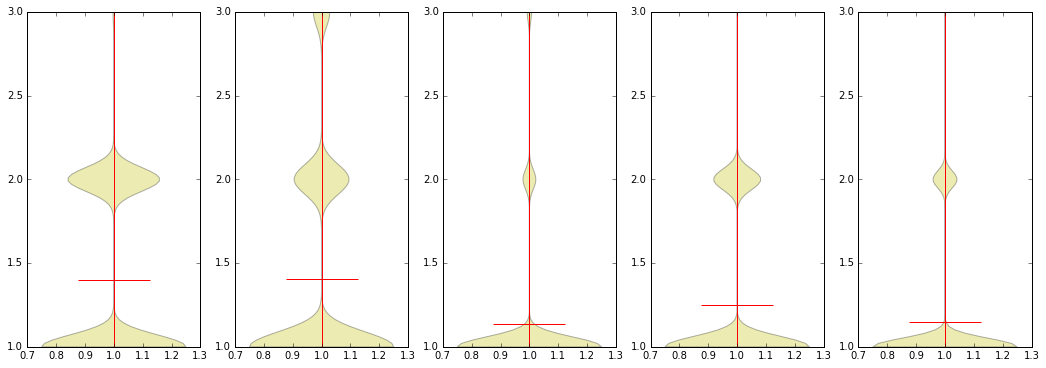

In [57]:
# Ventilation level distribution

fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (1,6):
    axes[i-1].violinplot(sp_vent[i],showmeans=True)

# Average Window Open Level

In [58]:
win_status={}
for i in range (1,6):
    lr = str(i) + 'avg_wc_lr'
    br2 = str(i) + 'avg_wc_br2'
    br1_br3 = str(i) + 'avg_wc_br1_br3'
    win_status[i] = (df505[lr]+df505[br2]+df505[br1_br3])/3

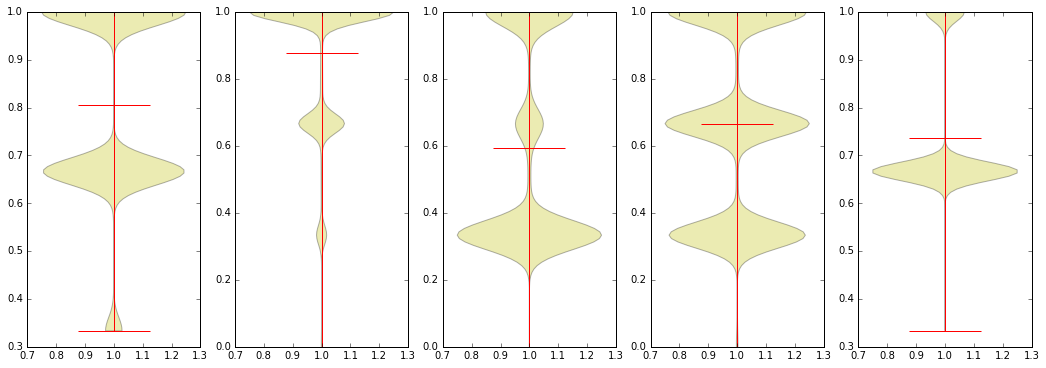

In [59]:
# window open level distribution

fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (1,6):
    axes[i-1].violinplot(win_status[i],showmeans=True)

# CO2 Level

In [60]:
co2={}
for i in range (1,6):
    lr = str(i) + 'avg_co2_lr'
    br2 = str(i) + 'avg_co2_br2'
    br1_br3 = str(i) + 'avg_co2_br1_br3'
    co2[i] = (df505[lr]+df505[br2]+df505[br1_br3])/3

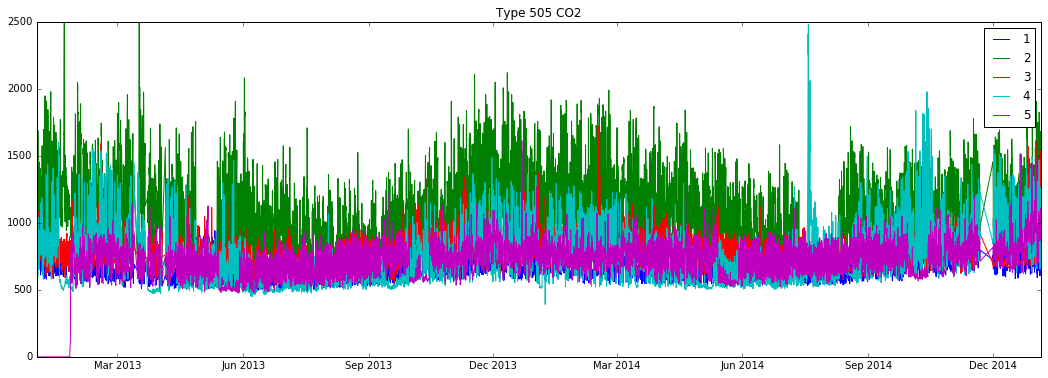

In [61]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (1,6):
    plt.plot(df505['date_trunc'],co2[i])
plt.ylim(0,2500)
plt.legend(('1','2','3','4','5'),loc='best') 
plt.title('Type 505 CO2')

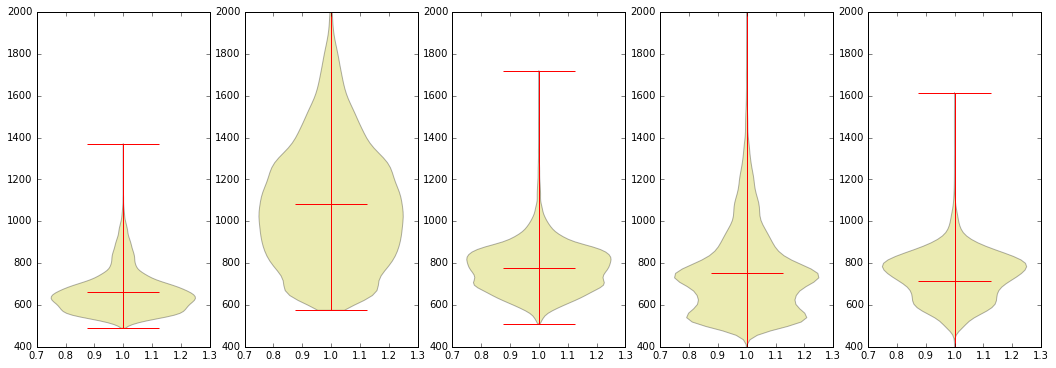

In [62]:
# CO2 level distribution

fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (1,6):
    axes[i-1].violinplot(co2[i],showmeans=True)
    axes[i-1].set_ylim(400,2000)

room 2 co2 level avg out of comfort zone (too high), mean time room 2 window open level lowest

# Energy Consumption

# Gas Consumption

In [63]:
df505_gs = {} 
for i in range (1,6):
    filename = '0' + str(i) + '00g.csv'
    gs = pd.read_csv("/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/Consumption_Study/Gas_Consumption/Datasets/"+ filename)
    gs['date_trunc'] = gs ['date'] + ' ' + gs ['time']
    gs['date_trunc'] = pd.to_datetime(gs['date_trunc'])
    df505_gs [i] = gs

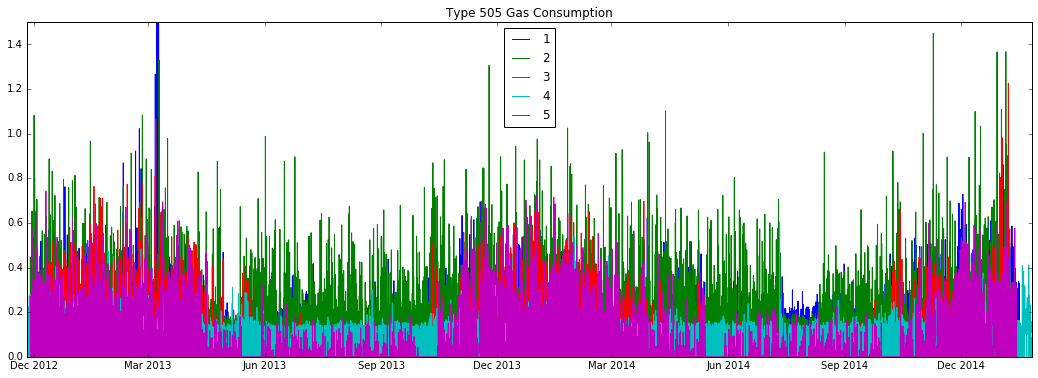

In [64]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (1,6):
    plt.plot(df505_gs[i].date_trunc,df505_gs [i].gc) 
    plt.ylim(0,1.5)
plt.legend(('1','2','3','4','5'),loc='best') 
plt.title('Type 505 Gas Consumption')

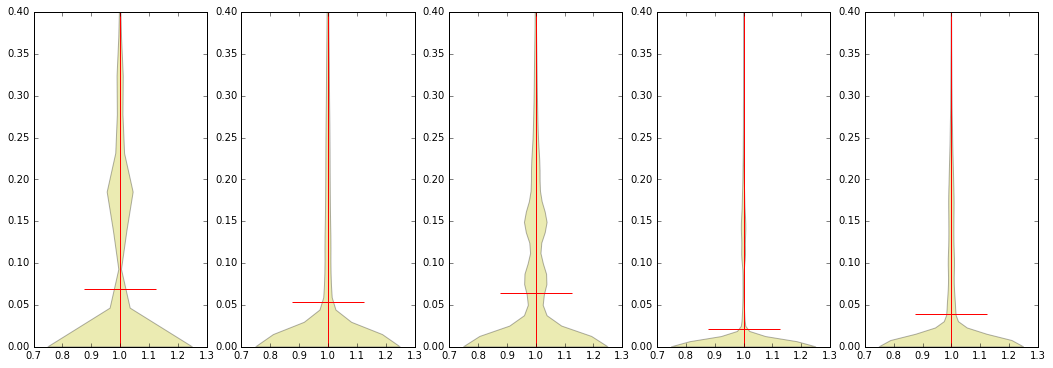

In [65]:
# Gas consumption distribution

fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (1,6):
    axes[i-1].violinplot(df505_gs [i].gc,showmeans=True)
    axes[i-1].set_ylim(0,0.4)

# Type 506

In [72]:
df506 = pd.read_csv("/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/v3_Type506_HourlyIndoor.csv")

In [73]:
df506.describe()

,6avg_wc_lr,6avg_wc_br2,6avg_wc_br1_br3,6set_point_ventilation_unit,6avg_t_lr,6avg_t_br2,6avg_t_br1_br3,6avg_co2_lr,6avg_co2_br2,6avg_co2_br1_br3,...,10avg_wc_lr,10avg_wc_br2,10avg_wc_br1_br3,10set_point_ventilation_unit,10avg_t_lr,10avg_t_br2,10avg_t_br1_br3,10avg_co2_lr,10avg_co2_br2,10avg_co2_br1_br3
count,17902.000000,17902.00000,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000,...,17902,17902.000000,17902.000000,17902.000000,17080.000000,17902.000000,17902.000000,17080.000000,17902.000000,17902.000000
mean,0.999913,0.98167,0.999634,1.638923,22.345816,21.830449,22.546140,830.992699,716.823316,779.474277,...,1,0.899548,0.692830,2.008714,18.266780,23.069394,22.623846,639.352266,855.297972,1027.816361
std,0.007740,0.13004,0.016730,0.556108,1.572064,2.061068,1.834685,232.004991,155.717296,261.402798,...,0,0.295716,0.447526,0.118799,6.846522,2.080137,1.725773,329.265657,151.055648,365.313575
min,0.100000,0.00000,0.000000,1.000000,18.100000,17.800000,18.800000,500.700000,451.800000,468.800000,...,1,0.000000,0.000000,1.000000,4.400000,18.300000,14.600000,4.000000,556.100000,508.200000
25%,1.000000,1.00000,1.000000,1.000000,21.200000,20.000000,21.000000,640.700000,584.825000,554.200000,...,1,1.000000,0.000000,2.000000,18.575000,21.500000,21.400000,602.000000,721.500000,727.025000
50%,1.000000,1.00000,1.000000,2.000000,22.100000,21.600000,22.300000,775.300000,677.200000,637.100000,...,1,1.000000,1.000000,2.000000,20.700000,22.500000,22.100000,729.800000,870.500000,927.050000
75%,1.000000,1.00000,1.000000,2.000000,23.300000,23.100000,23.700000,988.700000,843.575000,1056.700000,...,1,1.000000,1.000000,2.000000,22.300000,24.500000,23.500000,838.000000,969.400000,1294.225000
max,1.000000,1.00000,1.000000,3.000000,27.500000,27.800000,28.500000,3504.200000,1668.400000,1610.500000,...,1,1.000000,1.000000,3.000000,27.400000,30.100000,29.100000,1628.700000,1736.500000,2344.200000


In [74]:
for column in df506.columns:
    if df506[column].count() != 17902:
        df506[column].fillna(df506[column].mean(),inplace = True)
    else:
        continue

In [76]:
df506['date_trunc'] = pd.to_datetime(df506['date_trunc'])

# Indoor Temperature

In [77]:
avg_t_506={}
for i in range (6,11):
    lr = str(i) + 'avg_t_lr'
    br2 = str(i) + 'avg_t_br2'
    br1_br3 = str(i) + 'avg_t_br1_br3'
    avg_t_506[i] = (df506[lr]+df506[br2]+df506[br1_br3])/3

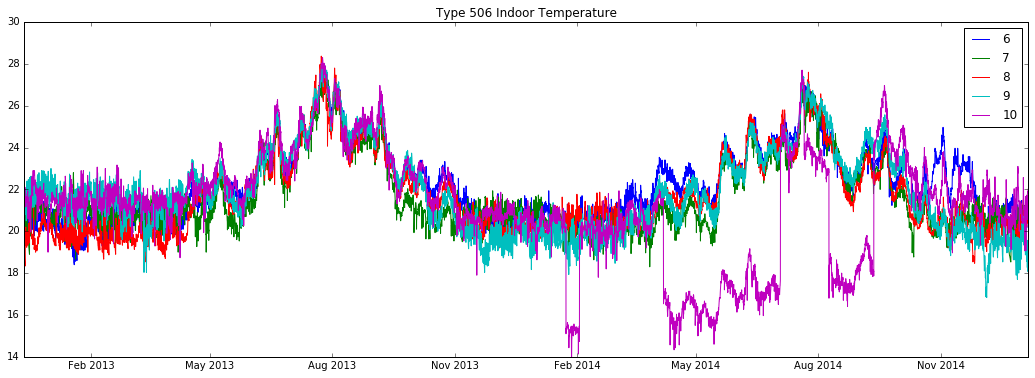

In [81]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (6,11):
    plt.plot(df506['date_trunc'],avg_t_506[i])
    plt.ylim(14,30)
plt.legend(('6','7','8','9','10'),loc='best') 
plt.title('Type 506 Indoor Temperature')

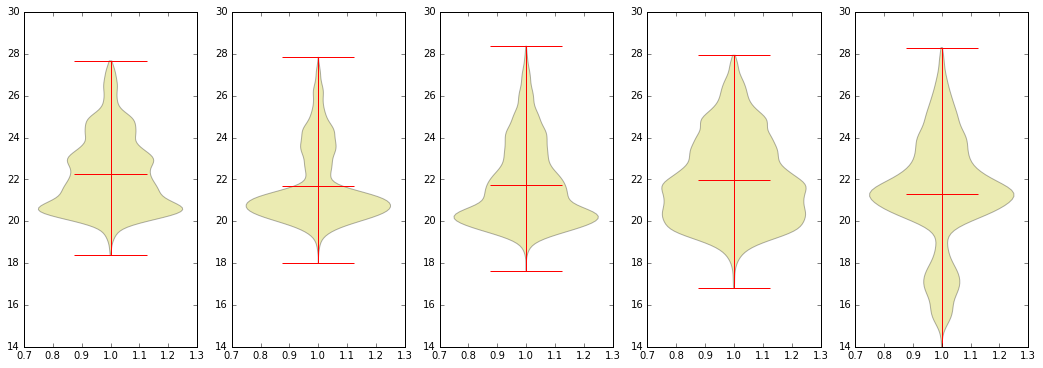

In [84]:
fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (6,11):
    axes[i-6].violinplot(avg_t_506[i],showmeans=True)
    axes[i-6].set_ylim(14,30)

# SetPoint Ventilation Level

In [85]:
sp_vent_506={}
for i in range (6,11):
    spv = str(i) + 'set_point_ventilation_unit'
    sp_vent_506[i] = df506[spv]

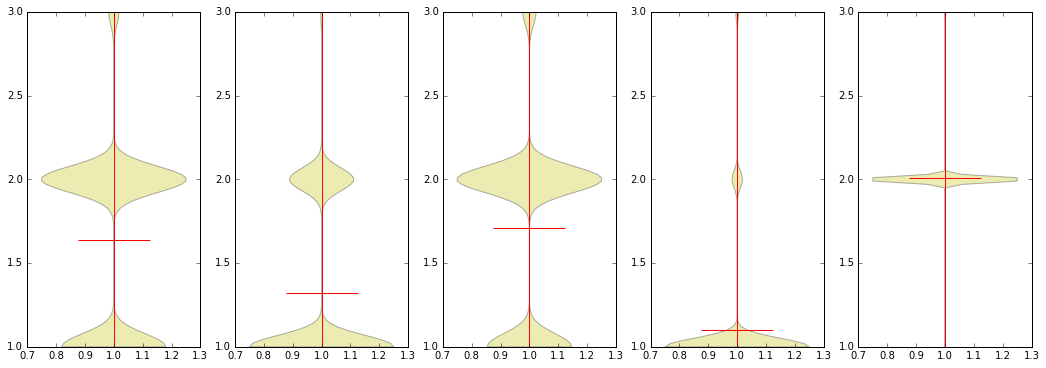

In [86]:
fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (6,11):
    axes[i-6].violinplot(sp_vent_506[i],showmeans=True)

# Average Window Open Level

In [87]:
win_status_506={}
for i in range (6,11):
    lr = str(i) + 'avg_wc_lr'
    br2 = str(i) + 'avg_wc_br2'
    br1_br3 = str(i) + 'avg_wc_br1_br3'
    win_status_506[i] = (df506[lr]+df506[br2]+df506[br1_br3])/3

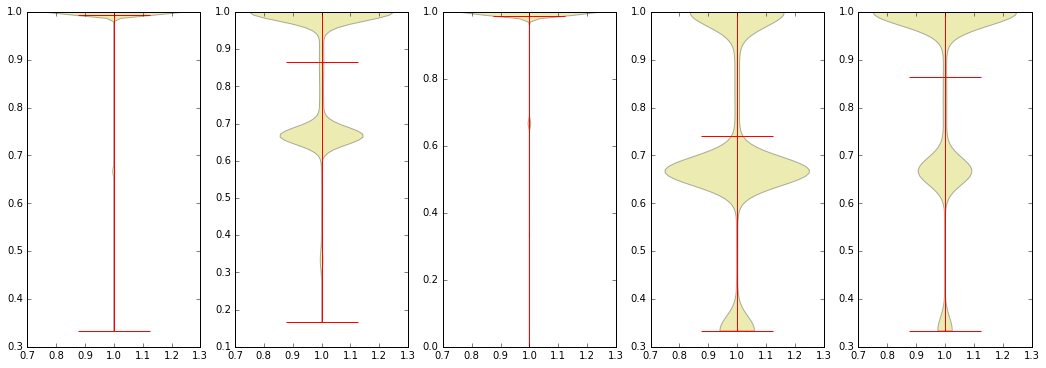

In [88]:
fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (6,11):
    axes[i-6].violinplot(win_status_506[i],showmeans=True)

# CO2 Level

In [89]:
co2_506={}
for i in range (6,11):
    lr = str(i) + 'avg_co2_lr'
    br2 = str(i) + 'avg_co2_br2'
    br1_br3 = str(i) + 'avg_co2_br1_br3'
    co2_506[i] = (df506[lr]+df506[br2]+df506[br1_br3])/3

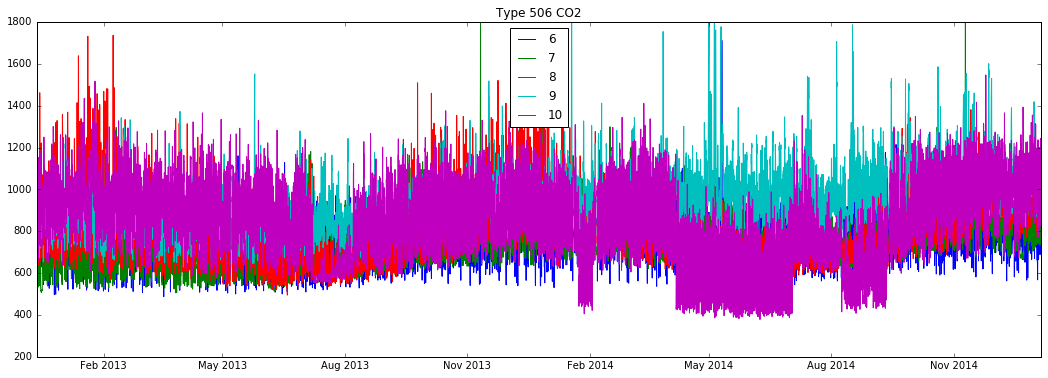

In [94]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (6,11):
    plt.plot(df506['date_trunc'],co2_506[i])
plt.ylim(200,1800)
plt.legend(('6','7','8','9','10'),loc='best') 
plt.title('Type 506 CO2')

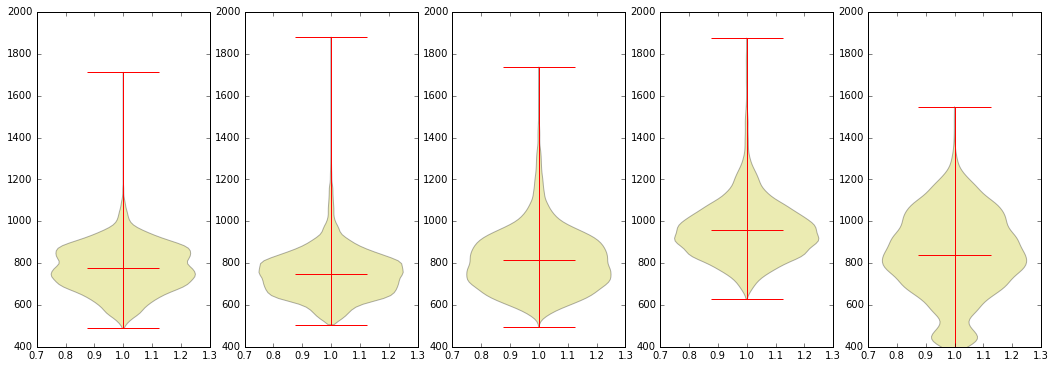

In [95]:
fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (6,11):
    axes[i-6].violinplot(co2_506[i],showmeans=True)
    axes[i-6].set_ylim(400,2000)

# Energy Consumption

# Gas Consumption

In [96]:
df506_gs = {} 
for i in range (6,11):
    filename = '0' + str(i) + '00g.csv'
    gs = pd.read_csv("/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/Consumption_Study/Gas_Consumption/Datasets/"+ filename)
    gs['date_trunc'] = gs ['date'] + ' ' + gs ['time']
    gs['date_trunc'] = pd.to_datetime(gs['date_trunc'])
    df506_gs [i] = gs

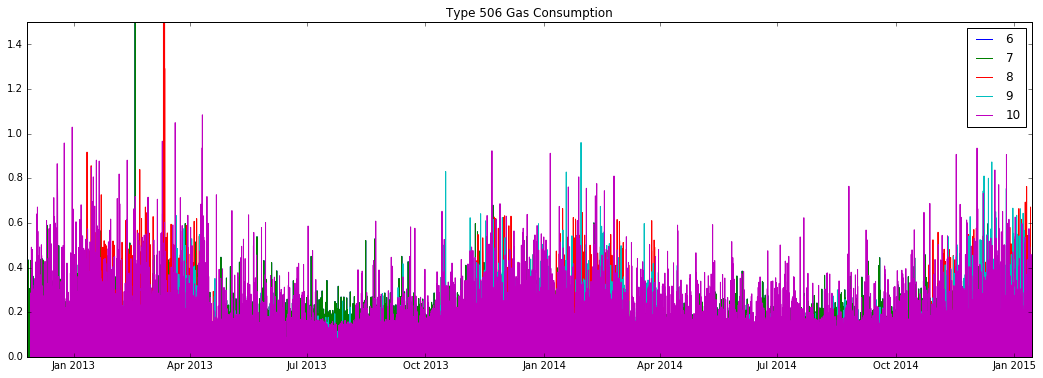

In [97]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
for i in range (6,11):
    plt.plot(df506_gs[i].date_trunc,df506_gs [i].gc) 
    plt.ylim(0,1.5)
plt.legend(('6','7','8','9','10'),loc='best') 
plt.title('Type 506 Gas Consumption')

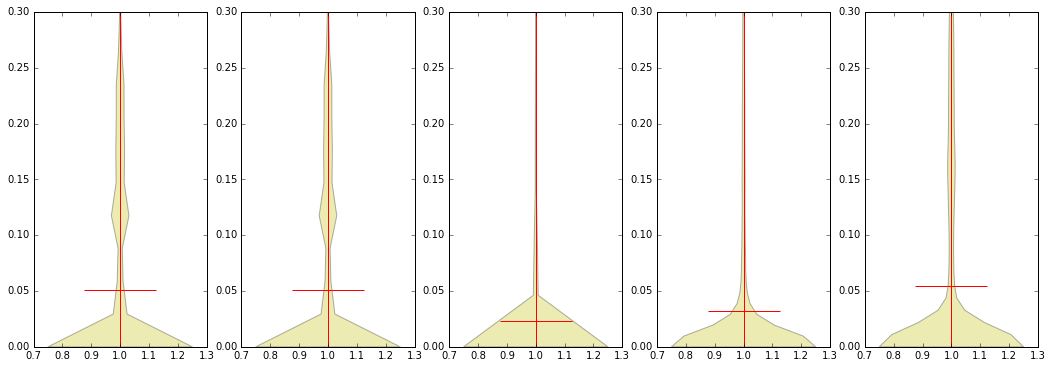

In [100]:
fig, axes = plt.subplots(ncols=5, nrows=1,figsize = (18,6))
for i in range (6,11):
    axes[i-6].violinplot(df506_gs [i].gc,showmeans=True)
    axes[i-6].set_ylim(0,0.3)